https://github.com/bojone/gan/blob/master/gan_numeric.py

In [1]:
#! -*- coding: utf-8 -*-
# https://kexue.fm/archives/6583

In [2]:
# Vanilla GAN

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def F(t, x):
    varphi1, varphi2, theta1, theta2 = x
    p = sigmoid(varphi1 * theta1 + varphi2 * theta2)
    return [-p * theta1, -p * theta2, (1 - p) * varphi1, (1 - p) * varphi2]

In [5]:
T = 100
h = 0.1

In [6]:
ts = np.arange(0, T, h)
xs = solve_ivp(F, (0, T), [0.1, 0.2, 0.2, 0.1], method='RK45', t_eval=ts)
varphi1, varphi2, theta1, theta2 = xs.y

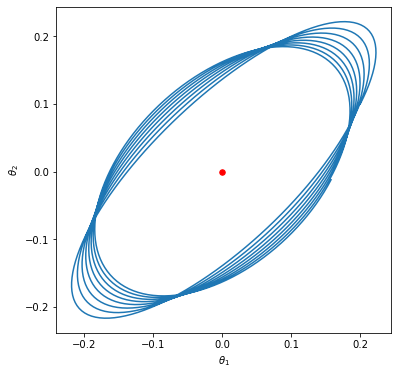

In [7]:
plt.figure(figsize=(6, 6))
plt.clf()
plt.plot(theta1, theta2)
plt.scatter(0, 0, 30, color='red')
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_2$')
plt.savefig('test.pdf')

In [8]:
# Vanilla GAN 动画

from matplotlib import animation


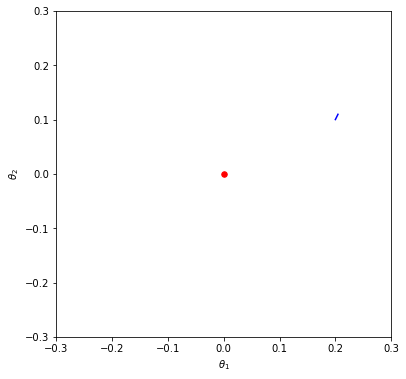

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(0, 0, 30, color='red')
ax.set_xlim(-0.3, 0.3)
ax.set_ylim(-0.3, 0.3)
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$\\theta_2$')
line, = plt.plot(theta1[:2], theta2[:2], color='blue')

In [10]:
def animate(i):
    line.set_data(theta1[:i], theta2[:i])
    return line,

In [11]:
anim = animation.FuncAnimation(fig=fig,
                               func=animate,
                               frames=range(12, len(theta1), 20),
                               interval=100)

anim.save('line.gif', writer='imagemagick', dpi=80)

MovieWriter imagemagick unavailable; using Pillow instead.
